## Datos erróneos y faltantes

Necesitamos recopilar o descargar datos antes de cualquier proyecto de ciencia de datos o aprendizaje automático. En un escenario ideal, los datos se recopilarán con alta calidad sin errores. Sin embargo, en realidad, ningún conjunto de datos está limpio. Todos los conjuntos de datos deben comprobarse en busca de datos erróneos o faltantes antes de usarlos. Siempre es importante hacerlo, ya que cualquier análisis con datos incorrectos o faltantes no será preciso.

Recuerde que debe importar los módulos necesarios al comienzo de un cuaderno. Puedes hacerlo en la celda de abajo.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

## 1. Datos erróneos

Los datos erróneos se refieren a datos que se recopilan incorrectamente o se ingresan incorrectamente en el conjunto de datos. Por ejemplo, si tenemos un conjunto de datos que contiene el número de habitaciones en una casa, esperamos que todos los valores sean positivos ya que no es posible tener un número negativo de habitaciones. Por lo tanto, todos los valores negativos dentro del conjunto de datos serán erróneos.

Si bien en algunos casos puede ser fácil identificar datos erróneos, puede que no sea así todo el tiempo. Usando la misma idea del conjunto de datos que contiene el número de habitaciones en una casa, también es posible que valores grandes también sean erróneos. Sin embargo, ahora no está tan claro si los números grandes son errores o valores atípicos. Esto se debe a que las casas muy grandes, como las mansiones, pueden tener muchas habitaciones. Como las mansiones son raras, sus puntos de datos aparecerán como valores atípicos. ¡Los valores atípicos no son datos erróneos! Los valores atípicos son solo casos raros y siguen siendo puntos de datos válidos.

El siguiente ejemplo le mostrará la diferencia entre datos erróneos y valores atípicos.

## 1.1 Pokemon Dataset

Echemos un vistazo al conjunto de datos de Pokémon que cubrimos en el módulo anterior. Este conjunto de datos viene con 2 partes:
1. Imágenes de Pokémon
2. Archivo CSV de Pokémon con datos de apoyo

Estos archivos son importantes y útiles para los próximos segmentos. Ahora debemos verificar si los datos contienen valores atípicos o datos erróneos. Usaremos la biblioteca matplotlib.image a nuestro favor. Usando los segmentos de código que se proporcionan a continuación, podemos importar y trazar las imágenes dentro del propio cuaderno de Jupyter.

In [2]:
# Leer imagen usando la función imread
img = mpimg.imread('PokeIMG/images/aggron.png')
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'PokeIMG/images/aggron.png'

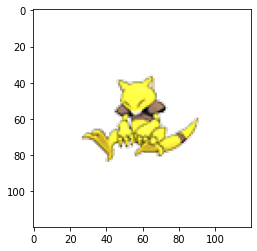

In [3]:
# Leer imagen usando la función imread
img = mpimg.imread('PokeIMG/images/abra.png')
plt.imshow(img)
plt.show()

¿Qué notas en la figura de arriba?

Como podemos ver, estamos visualizando 2 imágenes en los bloques de código anteriores, a saber, 'Aggron' y 'Abra'. Estas son 2 imágenes de muestra dentro del conjunto de datos. ¿Puedes decir cuál de estos es erróneo y por qué?

Respuesta:

La imagen de Aggron es errónea debido al tamaño de la imagen y cómo se ha escalado. En muchos conjuntos de datos de imágenes, puede haber imágenes que pueden estar sesgadas y tener tamaños extraños. Esto es algo que queremos evitar lo mejor que podamos. Consideremos una situación en la que estamos tratando de entrenar un modelo con estas imágenes y estamos asumiendo que las imágenes son todas del mismo tamaño. ¿Cómo resolvemos este problema? Veremos eso en los próximos bloques de código.

Veamos ahora los tamaños de las imágenes que hemos tenido en cuenta.

### Tarea: Imprima los tamaños de las imágenes 'Abra' y 'Aggron'

In [5]:
img = mpimg.imread('PokeIMG/images/abra.png')
print("Shape of abra = ", #suCódigoAquí)
img = mpimg.imread('PokeIMG/images/aggron.png')
print("Shape of aggron = ", #suCódigoAquí)

Shape of abra =  (120, 120, 4)
Shape of aggron =  (120, 168, 4)


Ahora vemos que los tamaños de las imágenes son visibles y no iguales. Aprenderemos cómo lidiar con estos errores en los próximos segmentos. Pero, antes de llegar, eche un vistazo a otra imagen en el conjunto de datos.

### Tarea: Usa matplotlib para dibujar la imagen 'Garchomp' y mostrar su tamaño

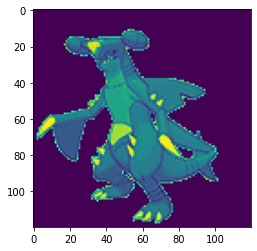

In [6]:
img = mpimg.imread('PokeIMG/images/garchomp.png')
plt.imshow(img)
plt.show()

In [7]:
#imprimir el tamaño de la imagen

#suCódigoAquí

(120, 120)

¿Qué ha notado en los segmentos de código anteriores? ¿Has notado que la imagen de garchomp es ligeramente diferente? La imagen de garchomp es una imagen en escala de grises a diferencia del resto de las imágenes. Ahora, consideremos una situación en la que estamos entrenando un modelo de aprendizaje automático para la visión por computadora. Durante este proceso tomamos en cuenta algunas suposiciones y consideraciones. Una de esas suposiciones podría ser que todas las imágenes deben estar coloreadas y no en escala de grises.

Eche un vistazo al bloque de código a continuación. Aquí estamos tratando de imprimir si la imagen es en escala de grises o no usa la forma de la imagen.

In [8]:
if len(img.shape) < 3:
    print('True') # Imprime True si la imagen está en escala de grises
else:
    print('False')

True


## 1.2 Manejando datos erróneos

Puede haber varias formas de tratar los datos erróneos en el conjunto de datos y en este notebook veremos varios métodos. Hay 2 errores con los que estamos lidiando hasta ahora.
1. Imágenes de tamaño incorrecto
2. Imágenes en escala de grises

Primero tratemos las imágenes de tamaño incorrecto. Recortaremos la imagen de Aggron y guardaremos la nueva imagen usando Python para que podamos seguir trabajando con ella. La forma en que maneja los datos erróneos depende completamente de usted y del modelo que está utilizando. También podría ser aconsejable eliminar la propia imagen. Pero para este ejemplo recortaremos la imagen y la guardaremos.

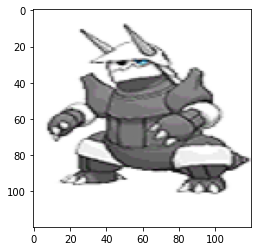

In [4]:
img = mpimg.imread('PokeIMG/images/aggron.png')
img = img[:,20:140,:]
plt.imshow(img)
plt.show()

In [10]:
plt.imsave('PokeIMG/images/aggron_1.png', img)

¿Cómo podemos lidiar con la imagen en escala de grises? ¿Y cómo sabemos si hay más imágenes en escala de grises? Escribamos un bucle for para recorrer los nombres en el conjunto de datos de Pokémon e intentar averiguar cuántas imágenes en escala de grises hay y cuántas faltan.

Leyendo el archivo CSV de pokemon con todo su contenido.

In [11]:
dataframe = pd.read_csv("pokemon.csv")

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    724 non-null    object 
 1   Type1   724 non-null    object 
 2   Type2   352 non-null    object 
 3   Power   724 non-null    float64
dtypes: float64(1), object(3)
memory usage: 22.8+ KB


In [13]:
dataframe.describe()

,Power
count,724.000000
mean,79.962707
std,20.019078
min,19.000000
25%,67.000000
50%,80.000000
75%,92.000000
max,159.000000


El siguiente bloque de código intenta recorrer las imágenes en la columna 'Nombre' del marco de datos. Después de lo cual intenta importar la imagen e imprimir un error es la imagen no se encuentra. Una vez obtenida la imagen, comprueba si la imagen es en escala de grises o no. De esta manera podemos encontrar todos los iamges en escala de grises en el conjunto de datos.

In [14]:
for i in dataframe['Name']:
    try:
        img = mpimg.imread('PokeIMG/images/' + i + '.png')
    except FileNotFoundError:
        print(i,' is missing!!')
        
        
    if len(img.shape) < 3:
        print(i, "is grayscale!!")


garchomp is grayscale!!
rowlet  is missing!!
rockruff  is missing!!
solgaleo  is missing!!


Felicidades. Hemos descubierto que solo ** garchomp ** es una imagen en escala de grises en todo el conjunto de datos. Para este ejemplo, eliminemos la imagen garchomp del conjunto de datos. Para borrar la imagen necesitamos borrar 2 menciones de la imagen.

La primera mención de la imagen está en la carpeta de imágenes. ** Vaya a la carpeta de imágenes de Pokémon y elimine el archivo garchomp.png **. La siguiente tarea es eliminar la mención de la imagen gamrchomp del conjunto de datos pokemon.csv. Cómo hacemos esto?

### Tarea: eliminar la fila con el nombre 'garchomp'

In [16]:
# ir a la carpeta de imágenes y eliminar la imagen garchomp
dataframe = dataframe[dataframe.Name != #suCódigoAquí]

Una vez más, recorramos nuestro conjunto de datos para comprobar si la imagen todavía está presente.

In [17]:
for i in dataframe['Name']:
    try:
        img = mpimg.imread('PokeIMG/images/' + i + '.png')
    except FileNotFoundError:
        print(i,' is missing!!')
    if len(img.shape) < 3:
        print(i, "is grayscale!!")

rowlet  is missing!!
rockruff  is missing!!
solgaleo  is missing!!


## 2. Datos faltantes

Los datos faltantes se refieren a lagunas dentro del conjunto de datos. Esto se debe a que no se pueden recopilar todos los puntos de datos. Por ejemplo, si debe contar el número de cartas entregadas por un cartero cada día, es posible que no tenga datos sobre los días en que el cartero estuvo de licencia. Por lo tanto, completará los datos de esos días como datos faltantes. Otra posible razón por la que faltan datos podría deberse al descuido de la persona que recopila los datos. A veces, la persona que recopila los datos puede haber olvidado ingresar los datos en el conjunto de datos. Además, si obtiene datos de formularios de encuestas, puede esperar encontrar datos faltantes debido a formularios incompletos. Esto se debe a que no todos completarán todos los campos dentro del formulario de la encuesta.

¿Puede proporcionar algunas posibles razones por las que pueden faltar datos en los escenarios enumerados a continuación?
- Número de horas que un profesor pasará en la escuela al día.
- Número de llamadas telefónicas que recibe un empleado de oficina en el teléfono móvil en un día
- Temperatura del aire de tu ciudad

- Es posible que el maestro no recuerde la cantidad de horas que pasó en la escuela
- El historial de llamadas se puede eliminar antes de que se registren los datos
- Es posible que los sensores de temperatura no hayan recopilado datos durante el mantenimiento

Los datos faltantes pueden tener muchas formas diferentes. Por lo general, nos referiremos a los datos faltantes como NaN, pero algunos conjuntos de datos utilizarán números muy grandes o números muy pequeños para representar los datos faltantes. Un ejemplo será el de los datos meteorológicos o meteorológicos. El valor de -9999 se utiliza para representar los valores de datos faltantes en estos conjuntos de datos.

Es importante eliminar o reemplazar estos valores de datos faltantes en un conjunto de datos antes de realizar cualquier análisis. Esto es para garantizar la precisión de nuestro análisis.

En el siguiente ejemplo, aprenderá a identificar y tratar estos valores perdidos.

Consideremos una vez más el ejemplo del conjunto de datos de Pokémon. Ejecute el bloque de código a continuación para detectar qué imágenes se mencionan en el archivo CSV pero están presentes en la carpeta de imágenes.

In [19]:
for i in dataframe['Name']:
    try:
        img = mpimg.imread('PokeIMG/images/' + i + '.png')
    except FileNotFoundError:
        print(i,' is missing')
        
        
    if len(img.shape) < 3:
        print(i, "is grayscale!!")

rowlet  is missing
rockruff  is missing
solgaleo  is missing


Podemos notar aquí que Rowlet, Rockruff y Solgaleo son 3 pokemon cuyos nombres están en el conjunto de datos, pero las imágenes no. Eliminemos una vez más las imágenes del conjunto de datos.

### Tarea: Eliminar las filas con nombres de imágenes faltantes

In [19]:
#suCódigoAquí

Ahora guardemos el dataframe

In [ ]:
dataframe.to_csv('pokemon.csv', index = False)